# CRACK Clssification using GAPS DATASET

## IMPORT LIBRARIES

In [1]:
from __future__ import print_function
#import readdata
from tensorflow import keras
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os

## LOAD DATA

# v2 6-classes 256

In [2]:
from importlib.machinery import SourceFileLoader
MODULENAME = "loadgaps"
MODULEPATH = "/home/ali/my_project/large_files/gaps/loadgaps.py"
lgaps = SourceFileLoader(MODULENAME, MODULEPATH).load_module()

x_train, y_train, x_valid, y_valid, x_test, y_test = lgaps.loadv2_ZEB256(load = 'low')

in the gaps v2 ZEB256
max tr = 25, max va = 5, max te = 5
low-load data in process
current: tr:2, va:1, te:1
loading 1 chunk  out of 2 of training in v2 gaps
loading 2 chunk  out of 2 of training in v2 gaps
loading 1 chunk  out of 1 of valid in v2 gaps
loading 1 chunk  out of 1 of test in v2 gaps
data name  is: gaps v2 ZEB256
input shape is : (256, 256, 3)
train num is : 4000
valid num is : 2000
test  num is : 2000
number of classes are : 6


# v1 binary 64

## BUILD MODEL

In [3]:
model_archive = {
                '1' : '2CCP_1FDD',
                '2' : 'DUPLICATE',
                '3' : 'Transfer_learning_vgg'
                    }
print(model_archive)

{'1': '2CCP_1FDD', '2': 'DUPLICATE', '3': 'Transfer_learning_vgg'}


In [4]:
import readmodel
model_name = 'model_1' # 'model_1', 'model_2', or model_3
input_shape = x_train[0,:,:,:].shape
num_classes = y_train.shape[1]
model = readmodel.modelchoose(model_name,input_shape, num_classes)
model.summary()

last change
X current model is: model_1_2CCP_1FDD
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d

## COMPILE MODEL

In [5]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-6)

print(num_classes)
# Let's train the model using RMSprop
if num_classes == 2:
    loss = 'binary_crossentropy'
if num_classes == 6:
    loss = 'categorical_crossentropy'
    
print(loss)

model.compile( loss = loss, # loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

6
categorical_crossentropy


 ## GENERATE IMAGES

In [12]:
epochs = 2 # 200
batch_size = 20
#num_classes = y_train_binary.shape[1]


## FIT DATA to MODEL w/o IMG GENRATOR

In [13]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_valid, y_valid),
              shuffle=True)

Train on 4000 samples, validate on 2000 samples
Epoch 1/2
4000/4000 [==============================] - 42s 11ms/sample - loss: 1.1928 - accuracy: 0.6097 - val_loss: 1.2273 - val_accuracy: 0.5920
Epoch 2/2
4000/4000 [==============================] - 42s 11ms/sample - loss: 1.1912 - accuracy: 0.6097 - val_loss: 1.2097 - val_accuracy: 0.5920


## MODEL SCORE

In [14]:
scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2000/1 - 4s - loss: 1.0284 - accuracy: 0.6045
Test loss: 1.1689034614562988
Test accuracy: 0.6045


## ACCURACY & VAL vs EPOCHS PLOTS

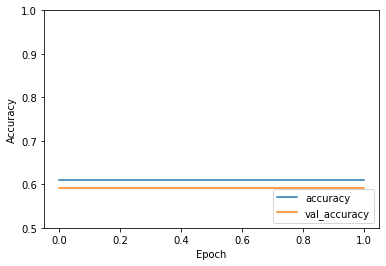

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## SAVE MODEL and WEIGHTS

In [16]:
model_weight_name = model_name + f'_epochs_{epochs}_batchsize_{batch_size}.h5'
print(model_weight_name)

model_1_epochs_2_batchsize_20.h5


In [17]:
os.getcwd()

'/home/ali/my_project/gaps'

In [20]:
import pickle
pickle_out = open("dict.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

#with open('/trainHistoryDict', 'wb') as file_pi:
#    pickle.dump(history.history, file_pi)

In [ ]:
import pickle

pickle_out = open("dict.pickle","wb")
pickle.dump(example_dict, pickle_out)
pickle_out.close()

#pickle_in = open("dict.pickle","rb")
#example_dict = pickle.load(pickle_in)
#print(example_dict)